In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Originaldokument
Vi leser inn originalfilen og endrer datostandard i pandas, før vi eksporterer den til OpenRefine. Der gjorde vi de største endringene på actor_name. Dette er dokumentert i rapporten.

In [88]:
df_original = pd.read_csv ("kudos_authoring_actors.csv", sep =';')

In [89]:
df_original['published_at'] = pd.to_datetime(df_original['published_at']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [90]:
df_original

,title,source_document_url,type,actor-name,language,published_at,length
0,Indikatorer for digital deltakelse og kompetan...,https://www.regjeringen.no/contentassets/9109c...,Forhåndsutredning,NIFU,no,2019-04-24 20:10:00,110911
1,Evaluering av norsk deltakelse i EUs rammeprog...,NaN,Evaluering,MENON Business Economics|Pöyry Norge,nob,2011-01-01 00:00:00,158229
2,Mid -term evaluation of eleven research schools,NaN,Evaluering,Internasjonal evalueringskomité,eng,2020-01-01 00:00:00,196164
3,Vurdering av Naturindekser i Norge med fokus p...,NaN,Evaluering,Havforskningsinstituttet,nob,2011-01-01 00:00:00,44603
4,Konseptvalgutredning (KVU) for kryssing av Osl...,https://www.regjeringen.no/contentassets/5ae65...,KVU/KS1/KS2,Statens vegvesen|Statens vegvesen Vestfold|Sta...,no,2014-11-19 20:06:00,27175
...,...,...,...,...,...,...,...
5271,Fagsystem for fastsetting av god økologisk til...,https://www.regjeringen.no/contentassets/7c4be...,Ukategorisert,Ekspertråd,no,2017-06-22 20:08:00,873731
5272,Trainee i landbruket. En evaluering av forpros...,NaN,Evaluering,Nordlandsforskning,nob,2014-01-01 00:00:00,85687
5273,Undersysselsetting og ufrivillig deltid,NaN,Evaluering,Forskningsstiftelsen fafo|Fafo,nob,2011-01-01 00:00:00,138516
5274,To mål – to midler,NaN,Evaluering,Oxford Resarch|Handelshøyskolen BI,nob,2010-01-01 00:00:00,218173


Da har vi endret "published_at"-datoen til å følge ISO-standard. Så leser vi videre den inn i OpenRefine og jobber med rensing av data, ser på interessante trender, slik som lange aktørstrenger, duplikater og mer. 

In [91]:
df_original.to_csv('kudos_ISO_dato_endret.csv', sep= '|')

### Revidert dokument
Vi leser deretter inn det nye dokumentet

Siden vi vet, gjennom OpenRefine, at det er ett dokument med en tom tittel, velger vi å fjerne den ved bruk av `dropna` i tittel-kolonnen. I kommentaren er en løsning for å droppe duplikater, men vi endte opp med å finne en annen løsning som sørget for at vi endte med den mest mulig komplette raden.

In [92]:
df = pd.read_csv("BIB3400_FerdigCSVGruppe5.csv", sep=',' , index_col = "Column").dropna(subset='title')#.drop_duplicates(subset=['title', 'length'])


Her spør vi etter et spesifikt eksempel på et duplikat som vi vet finnes, gjennom OpenRefine, for å se hvilke dokumenter som blir beholdt. Kommentert etter strengen er et eksempel på et dokument som har 3 duplikater, der en av de har en url. Ved å bruke `groupby.first`, velger den ut de relevante kolonnene, slik at det unike ferdige dokumentet ender med de viktigste  en dokument-url.

In [93]:
df = df.reset_index().groupby(['title', 'length'], as_index=False).first().set_index('Column')#.query('title== "Evaluering av føringstilskuddet i fiskerinæringen"')

## Interessante utdrag

Ved å kjøre `df.info` kan vi se på de forskjellige verdiene i kolonnene, der vi ser at det er bare 2083 dokumenter som har dokument-URL. Og vi ser at det er 18 dokumenter som ikke har noen, eller har feil format, på publiseringsdato.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 2829 to 28
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                5127 non-null   object
 1   length               5127 non-null   int64 
 2   source_document_url  2119 non-null   object
 3   type                 5127 non-null   object
 4   actor-name           5127 non-null   object
 5   language             5127 non-null   object
 6   published_at         5109 non-null   object
dtypes: int64(1), object(6)
memory usage: 320.4+ KB


Vi ser ved å få pandas til å beskrive 'actor-name' og 'type', at Riksrevisjonen har levert flest dokumenter. At det er flest dokumenter som er kategorisert som Evaluering. Vi ser i den ferdige 

In [95]:
df[['actor-name', 'type']].describe()

,actor-name,type
count,5127,5127
unique,1002,11
top,Riksrevisjonen,Evaluering
freq,346,3247


In [96]:
df['title'].sort_values()

Column
2829          Joint evaluations of research and education
170                                 Operasjon operanasjon
4547                  "... ikke i mål, men på god vei."
874     "Anbud på norsk" :  konkurranseutsetting og fr...
110                                 "Da ars møtte techne"
                              ...                        
3151    Økt samhandling om digitalisering av statlig o...
2725                    Østre linjes forbindelse mot Oslo
1796                         Øvelse nødkommunikasjon 2010
2256    “Everyone wants to leave” Transit migration fr...
28      ”Derfor blir vi her” – innvandrere i Distrikts...
Name: title, Length: 5127, dtype: object

Over ser vi at enkelte dokumenter har et mellomrom eller en annen usynlig karakter før tittelen på dokumentet, som gjør at dette blir sortert først når vi sorterer tekstverdiene. Vi bruker da en string-strip for å fjerne tomme karakterer, og får da anførselstegn øverst. Nederst i listen ser vi at en annen type anførselstegn. En av de er mer internasjonalt brukt, som henger sammen med at dokumentet er skrevet på engelsk. Vi velger å endre disse anførselstegnene til "norske", for å sortere ytterligere i dokumentet. 

In [97]:
df['title'].str.strip().sort_values()

Column
4547                  "... ikke i mål, men på god vei."
874     "Anbud på norsk" :  konkurranseutsetting og fr...
110                                 "Da ars møtte techne"
1903                                        "Det er fedt"
3066     "Det er litt sånn at veien blir til mens en går"
                              ...                        
3151    Økt samhandling om digitalisering av statlig o...
2725                    Østre linjes forbindelse mot Oslo
1796                         Øvelse nødkommunikasjon 2010
2256    “Everyone wants to leave” Transit migration fr...
28      ”Derfor blir vi her” – innvandrere i Distrikts...
Name: title, Length: 5127, dtype: object

Her bruker vi en string-replace for å gjøre om ulike anførselstegn til èn type.

In [98]:
df['title'].str.replace('”','"').str.replace('“','"').str.strip().sort_values()

Column
4547                  "... ikke i mål, men på god vei."
874     "Anbud på norsk" :  konkurranseutsetting og fr...
110                                 "Da ars møtte techne"
28      "Derfor blir vi her" – innvandrere i Distrikts...
1903                                        "Det er fedt"
                              ...                        
1580    Økt kunnskap og kompetanse blant ansatte i små...
1060                      Økt rekruttering til landbruket
3151    Økt samhandling om digitalisering av statlig o...
2725                    Østre linjes forbindelse mot Oslo
1796                         Øvelse nødkommunikasjon 2010
Name: title, Length: 5127, dtype: object

### Forsøkte endringer
I den neste delen vurderte vi om vi skulle splitte aktørnavnene, for så å forsøke å `merge`, slik at vi kunne lettere se eventuelle skirvefeil og varierende skrivemåter. Vi endte opp med å ikke fullføre dette, ettersom det var vanskelig å utføre og ikke førte noe særlig nyttig med seg. Forsøket førte derimot til at vi skjønte mer om problemstillingen rundt unike aktørnavn. 

In [99]:
#df['actor-name'].str.split('|')

In [100]:
#df_splitted = df['actor-name'].str.split('|', expand=True)

In [101]:
#df_splitted

In [102]:
#df_splitted1 = df_splitted.stack().str.strip().reset_index()

In [103]:
#df_splitted1

In [104]:
#df_output = df.merge(df_splitted1 , left_index = True , right_on = "Column")

In [105]:
#df_output.to_csv("output.csv", sep="|")

## Grafer og plotter

In [111]:
fig = px.pie(df, names = 'type')
fig.update_layout(showlegend = True)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()


Her har vi visualisert hvilke type dokumenter som utgjør størst andel av datasettet.

In [107]:
df.sort_values('length')

,title,length,source_document_url,type,actor-name,language,published_at
Column,,,,,,,
4263,Dobbeltspor Arna-Fløen (jernbane) og Arnatunne...,0,None,KVU/KS1/KS2,Transportøkonomisk institutt (TØI)|Dovre Inter...,nb,2008-01-01 00:00:00
1810,Utdanning blant styrere og pedagogiske ledere ...,0,None,Evaluering,Nordic Veterinary and Agricultural University,nb,2007-01-01 00:00:00
3964,Kvalitetskontroll av returflis,0,None,Evaluering,Norsk energi,nb,2009-01-01 00:00:00
1620,Serviceundersøkelse Brønnøysundregistrene,0,None,Evaluering,MMI,nb,2000-01-01 00:00:00
4436,Oppgaver og ressursbruk i kriminalomsorgen,0,None,Evaluering,BDO,nb,2013-01-01 00:00:00
...,...,...,...,...,...,...,...
3238,Barnehagelærerrollen i et profesjonsperspektiv...,1316086,https://www.regjeringen.no/contentassets/f7895...,Forhåndsutredning,Ekspertgruppe,no,2018-05-12 20:10:00
3508,Et ansvarlig politi,1338770,None,Evaluering,Finstad-utvalget,nb,2009-01-01 00:00:00
589,Samhandling i en selvstendig folkekirke – ny k...,1552901,https://kirken.no/globalassets/kirken.no/om-ki...,Forhåndsutredning,Kirkerådet,no,2021-01-01 20:17:00


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Evaluering'),
  Text(1, 0, 'Statusrapport'),
  Text(2, 0, 'Studie'),
  Text(3, 0, 'Forhåndsutredning'),
  Text(4, 0, 'Kartlegging'),
  Text(5, 0, 'Kunnskapsoppsummering'),
  Text(6, 0, 'Ukategorisert'),
  Text(7, 0, 'Strategi/plan'),
  Text(8, 0, 'KVU/KS1/KS2'),
  Text(9, 0, 'Riksrevisjonsrapport'),
  Text(10, 0, 'Områdegjennomgang')])

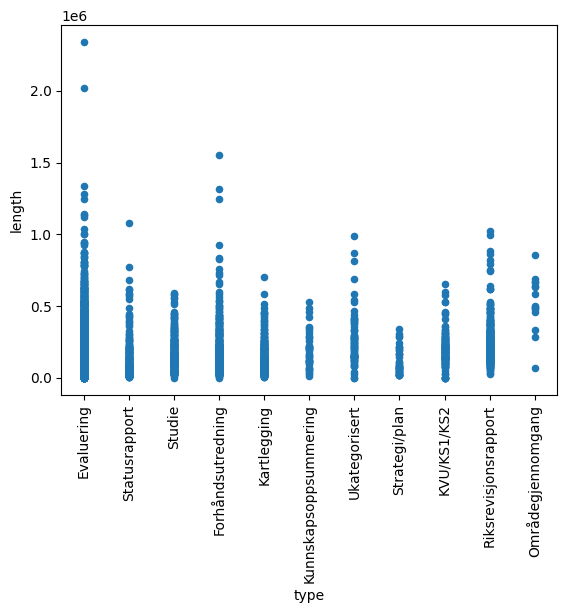

In [108]:
df.plot(x='type', y='length', kind='scatter')
plt.xticks(rotation=90)

I en boxplot ønsker vi å se på data, som ikke blir skitnet til av dokumenter som har en `length`-verdi på `0`. Vi kjører vi en spørring og setter  en begrensing på at `length` må være større enn 0. I boxplotten sorterer vi da innenfor parameterne 0, 1 000 000. 1 000 000 gjør vi fordi det kun er noen få avvik over 1 000 000 tegn, og vi kan se trender enklere ved å begrense utvalget. 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Evaluering'),
  Text(2, 0, 'Forhåndsutredning'),
  Text(3, 0, 'KVU/KS1/KS2'),
  Text(4, 0, 'Kartlegging'),
  Text(5, 0, 'Kunnskapsoppsummering'),
  Text(6, 0, 'Områdegjennomgang'),
  Text(7, 0, 'Riksrevisjonsrapport'),
  Text(8, 0, 'Statusrapport'),
  Text(9, 0, 'Strategi/plan'),
  Text(10, 0, 'Studie'),
  Text(11, 0, 'Ukategorisert')])

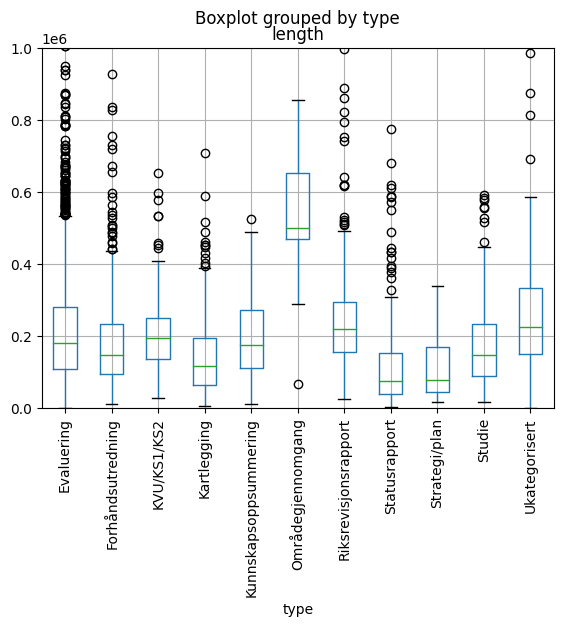

In [109]:
df.query('length>0').boxplot(by='type', column='length')
plt.ylim(0,1000000)
plt.xticks(rotation=90)

In [110]:
df.query('length>0')

,title,length,source_document_url,type,actor-name,language,published_at
Column,,,,,,,
2829,Joint evaluations of research and education,314810,https://www.nokut.no/globalassets/nokut/rappor...,Evaluering,Forskningsrådet|Nasjonalt organ for kvalitet i...,no,2018-01-01 20:16:00
170,Operasjon operanasjon,297529,https://www.regjeringen.no/contentassets/80525...,Evaluering,Telemarksforsking,no,2016-04-05 20:08:00
4547,"""... ikke i mål, men på god vei.""",94312,https://www.nokut.no/contentassets/9989482e51f...,Statusrapport,Nasjonalt organ for kvalitet i utdanningen|NOKUT,no,2016-01-01 20:18:00
874,"""Anbud på norsk"" : konkurranseutsetting og fr...",169470,None,Evaluering,Transportøkonomisk institutt (TØI),nb,2008-01-01 00:00:00
110,"""Da ars møtte techne""",126273,None,Evaluering,Telemarksforsking Bø,nb,2009-01-01 00:00:00
...,...,...,...,...,...,...,...
3151,Økt samhandling om digitalisering av statlig o...,26505,https://www.regjeringen.no/contentassets/ffcfb...,Forhåndsutredning,Arbeidsgruppe,no,2016-04-14 20:07:00
2725,Østre linjes forbindelse mot Oslo,211592,https://www.regjeringen.no/contentassets/97560...,KVU/KS1/KS2,Transportøkonomisk institutt (TØI)|Dovre Group,no,2016-05-10 20:08:00
1796,Øvelse nødkommunikasjon 2010,44615,None,Evaluering,Nasjonalt sammensatt evalueringskomité,nb,2010-01-01 00:00:00


Vi går fra 5127 rader til 5018 rader, når vi setter begrensningen.

### Boxplot
\
En boxplot gir oss en pekepinn på trendene vi ser, og forholdet mellom type dokument og lengden på de. Vi ser at evalueringer har en god del avvik som tenderer mot et langt dokument, mens områdegjennomgang har det høyeste gjennomsnittet på lengde.Vi ser at de fleste dokumentene av type Områdegjennomgang ligger mellom 500 000 og 700 000 tegn.

Statusrapporter er den typen dokumenter som trender med lavest lengde på dokument. Ved bruk av en scatter-plot ser det ut som det er Strategi/plan, men boxplotten gjør det tydelig at det er flere dokumenter med kortere lengder.